# Normalization

We want to normalize data in order to improve classification performance.

In [2]:
%cd ../..
%matplotlib inline

/home/marat/projects/p300speller


In [6]:
import glob
import os

CORPORA_PATH = "~/projects/corpora/P3Speller/P3Speller-old-y-datos/sets/"

file_path = os.path.expanduser(CORPORA_PATH)
files = glob.glob(os.path.join(file_path, "*.set"))


filename = files[11]

In [22]:
import mne

def event_id_func(x):
    return 1 if x == "0" else 2

data_mne = mne.io.read_raw_eeglab(
    filename, preload=True, event_id_func=event_id_func)

data_mne.filter(1, 20)

Reading /home/marat/projects/corpora/P3Speller/P3Speller-old-y-datos/sets/PruebasMuseo_23298001.fdt
Reading 0 ... 69503  =      0.000 ...   542.992 secs...
Setting up band-pass filter from 1 - 20 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 5.0 Hz
Filter length of 845 samples (6.602 sec) selected


<RawEEGLAB  |  PruebasMuseo_23298001.fdt, n_channels x n_times : 15 x 69504 (543.0 sec), ~8.0 MB, data loaded>

In [23]:
data_mne.ch_names

['AF3',
 'F7',
 'F3',
 'FC5',
 'T7',
 'P7',
 'O1',
 'O2',
 'P8',
 'T8',
 'FC6',
 'F4',
 'F8',
 'AF4',
 'STI 014']

In [24]:
events = mne.find_events(data_mne)
baseline = (None, 0)


1980 events found
Events id: [1 2]


In [25]:
event_id = {"D": 1, "T": 2}
epochs = mne.Epochs(
    data_mne, events, event_id,
    baseline=baseline, tmin=-0.1, tmax=0.7)
epochs.load_data()

1980 matching events found
0 projection items activated
Loading data for 1980 events and 104 original time points ...
0 bad epochs dropped


<Epochs  |  n_events : 1980 (all good), tmin : -0.1015625 (s), tmax : 0.703125 (s), baseline : (None, 0), ~23.6 MB, data loaded,
 'D': 1650, 'T': 330>

Channels have 0 mean, but their variance is very small. Let's normalize them

Channel mean = 9.227670120624181e-07 std = 1.0013143029855116e-05


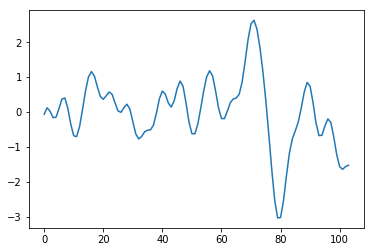

Channel mean = 3.3500954105368495e-06 std = 9.358169430875987e-06


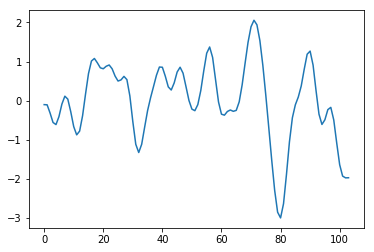

Channel mean = 5.790955144678255e-07 std = 2.0661507529693855e-06


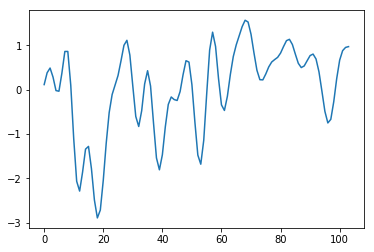

Channel mean = 1.4941670743500842e-06 std = 9.050830777827952e-06


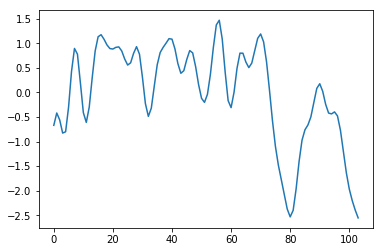

Channel mean = 3.287123555324261e-06 std = 9.070292684812216e-06


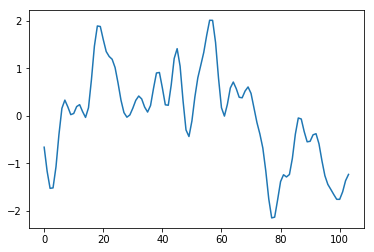

Channel mean = 1.882934447693193e-07 std = 6.634653011366737e-06


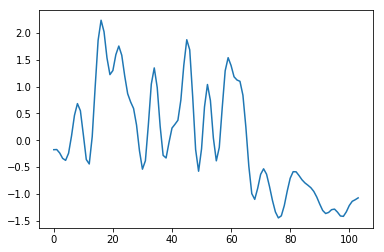

Channel mean = 9.03729509676114e-07 std = 6.220007012596884e-06


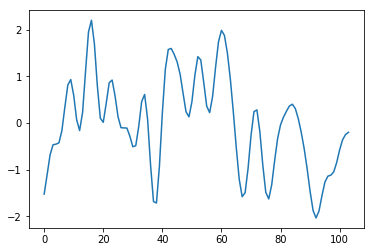

Channel mean = 4.6863364169728134e-07 std = 7.914407092848664e-06


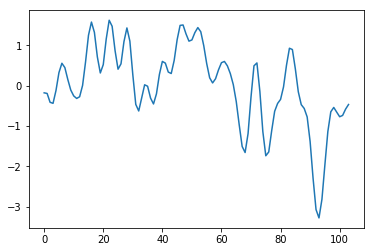

Channel mean = -1.0422036523281963e-06 std = 6.466761768132023e-06


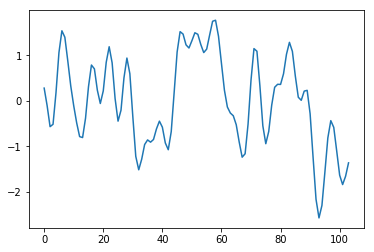

Channel mean = -1.1142299314033739e-05 std = 1.363763839521809e-05


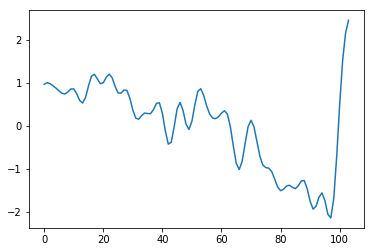

Channel mean = 1.1280628440729555e-06 std = 7.888191381609236e-06


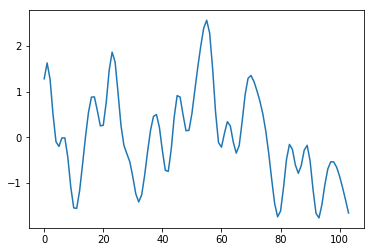

Channel mean = -4.0601725352116546e-05 std = 2.2583296723523336e-05


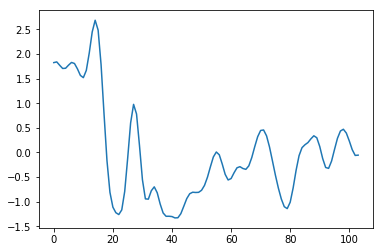

Channel mean = -1.2432502483607577e-06 std = 1.8931172262110696e-05


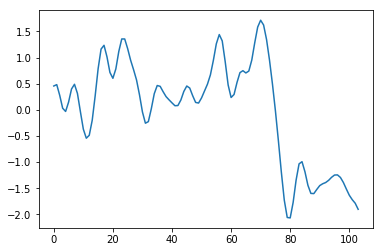

Channel mean = -6.055759744296498e-07 std = 4.246656298484103e-06


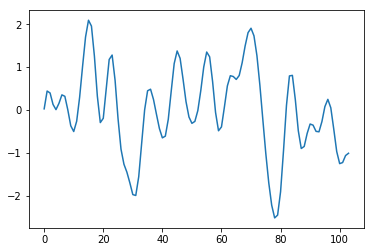

Channel mean = 0.028846153846153848 std = 0.1673739921685501


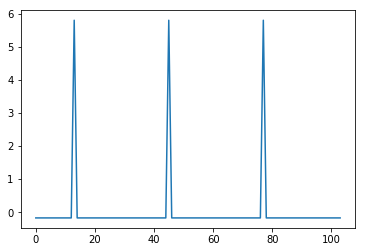

In [52]:
import matplotlib.pyplot as plt
epoch = epochs.get_data()[0]

for channel in epoch:
    m = channel.mean()
    std = channel.std()
    print("Channel mean = {} std = {}".format(m, std))
    plt.plot((channel - m)/std)
    plt.show()